<a href="https://colab.research.google.com/github/mikhailmuniz1/Analise-preditiva-de-evas-o-Telecom-X/blob/main/an%C3%A1lise_preditiva_Telecom_X_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠️ Preparação dos Dados

In [2]:
import pandas as pd

df = pd.read_csv('/content/telecomx_cleaned.csv')

# Exibe as primeiras 5 linhas do dataframe
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True


In [3]:
# Remove a coluna 'customerID'
df = df.drop('customerID', axis=1)

# Exibe as primeiras 5 linhas do dataframe sem a coluna 'customerID'
display(df.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


In [4]:
# Identifica colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns

# Aplica one-hot encoding nas colunas categóricas
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Exibe as primeiras 5 linhas do dataframe após a codificação
display(df.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


In [5]:
# Calcule a contagem de cada valor na coluna 'Churn'
churn_counts = df['Churn'].value_counts()

# Calcule a proporção de cada valor
churn_proportions = df['Churn'].value_counts(normalize=True)

# Exiba os resultados
print("Contagem de clientes por Churn:")
print(churn_counts)
print("\nProporção de clientes por Churn:")
print(churn_proportions)

# Verifique se há desequilíbrio significativo (por exemplo, se a menor classe for inferior a 20% da maior)
# Você pode ajustar este limite conforme necessário
imbalance_threshold = 0.2

if churn_proportions.min() / churn_proportions.max() < imbalance_threshold:
    print("\nAtenção: Há um desequilíbrio significativo nas classes de Churn.")
else:
    print("\nNão há um desequilíbrio significativo nas classes de Churn.")

Contagem de clientes por Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de clientes por Churn:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Não há um desequilíbrio significativo nas classes de Churn.


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir os dados em treino e teste (opcional, mas recomendado antes de aplicar SMOTE para evitar data leakage)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Aplicar SMOTE apenas nos dados de treino (se você dividiu os dados)
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ou aplicar SMOTE no conjunto completo se não for dividir agora (cuidado com data leakage em um fluxo de ML completo)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Shape do dataset original:", X.shape, y.shape)
# print("Shape do dataset de treino rebalanceado:", X_train_resampled.shape, y_train_resampled.shape) # Se você dividiu os dados
print("Shape do dataset rebalanceado (completo):", X_resampled.shape, y_resampled.shape)

print("\nContagem das classes originais:\n", y.value_counts())
# print("\nContagem das classes de treino rebalanceadas:\n", y_train_resampled.value_counts()) # Se você dividiu os dados
print("\nContagem das classes rebalanceadas (completo):\n", y_resampled.value_counts())

Shape do dataset original: (7043, 31) (7043,)
Shape do dataset rebalanceado (completo): (10348, 31) (10348,)

Contagem das classes originais:
 Churn
0    5174
1    1869
Name: count, dtype: int64

Contagem das classes rebalanceadas (completo):
 Churn
0    5174
1    5174
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# É uma boa prática dividir os dados antes de escalar para evitar data leakage
# Se você aplicou SMOTE no conjunto completo (como no passo anterior), divida X_resampled e y_resampled agora
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler *apenas* nos dados de treino e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste usando o scaler ajustado nos dados de treino
X_test_scaled = scaler.transform(X_test)

print("Shape dos dados de treino escalados:", X_train_scaled.shape)
print("Shape dos dados de teste escalados:", X_test_scaled.shape)

# Você pode inspecionar os dados escalados (primeiras linhas)
# print("\nPrimeiras 5 linhas dos dados de treino escalados:\n", X_train_scaled[:5])
# print("\nPrimeiras 5 linhas dos dados de teste escalados:\n", X_test_scaled[:5])

Shape dos dados de treino escalados: (8278, 31)
Shape dos dados de teste escalados: (2070, 31)


🎯 Correlação e Seleção de Variáveis

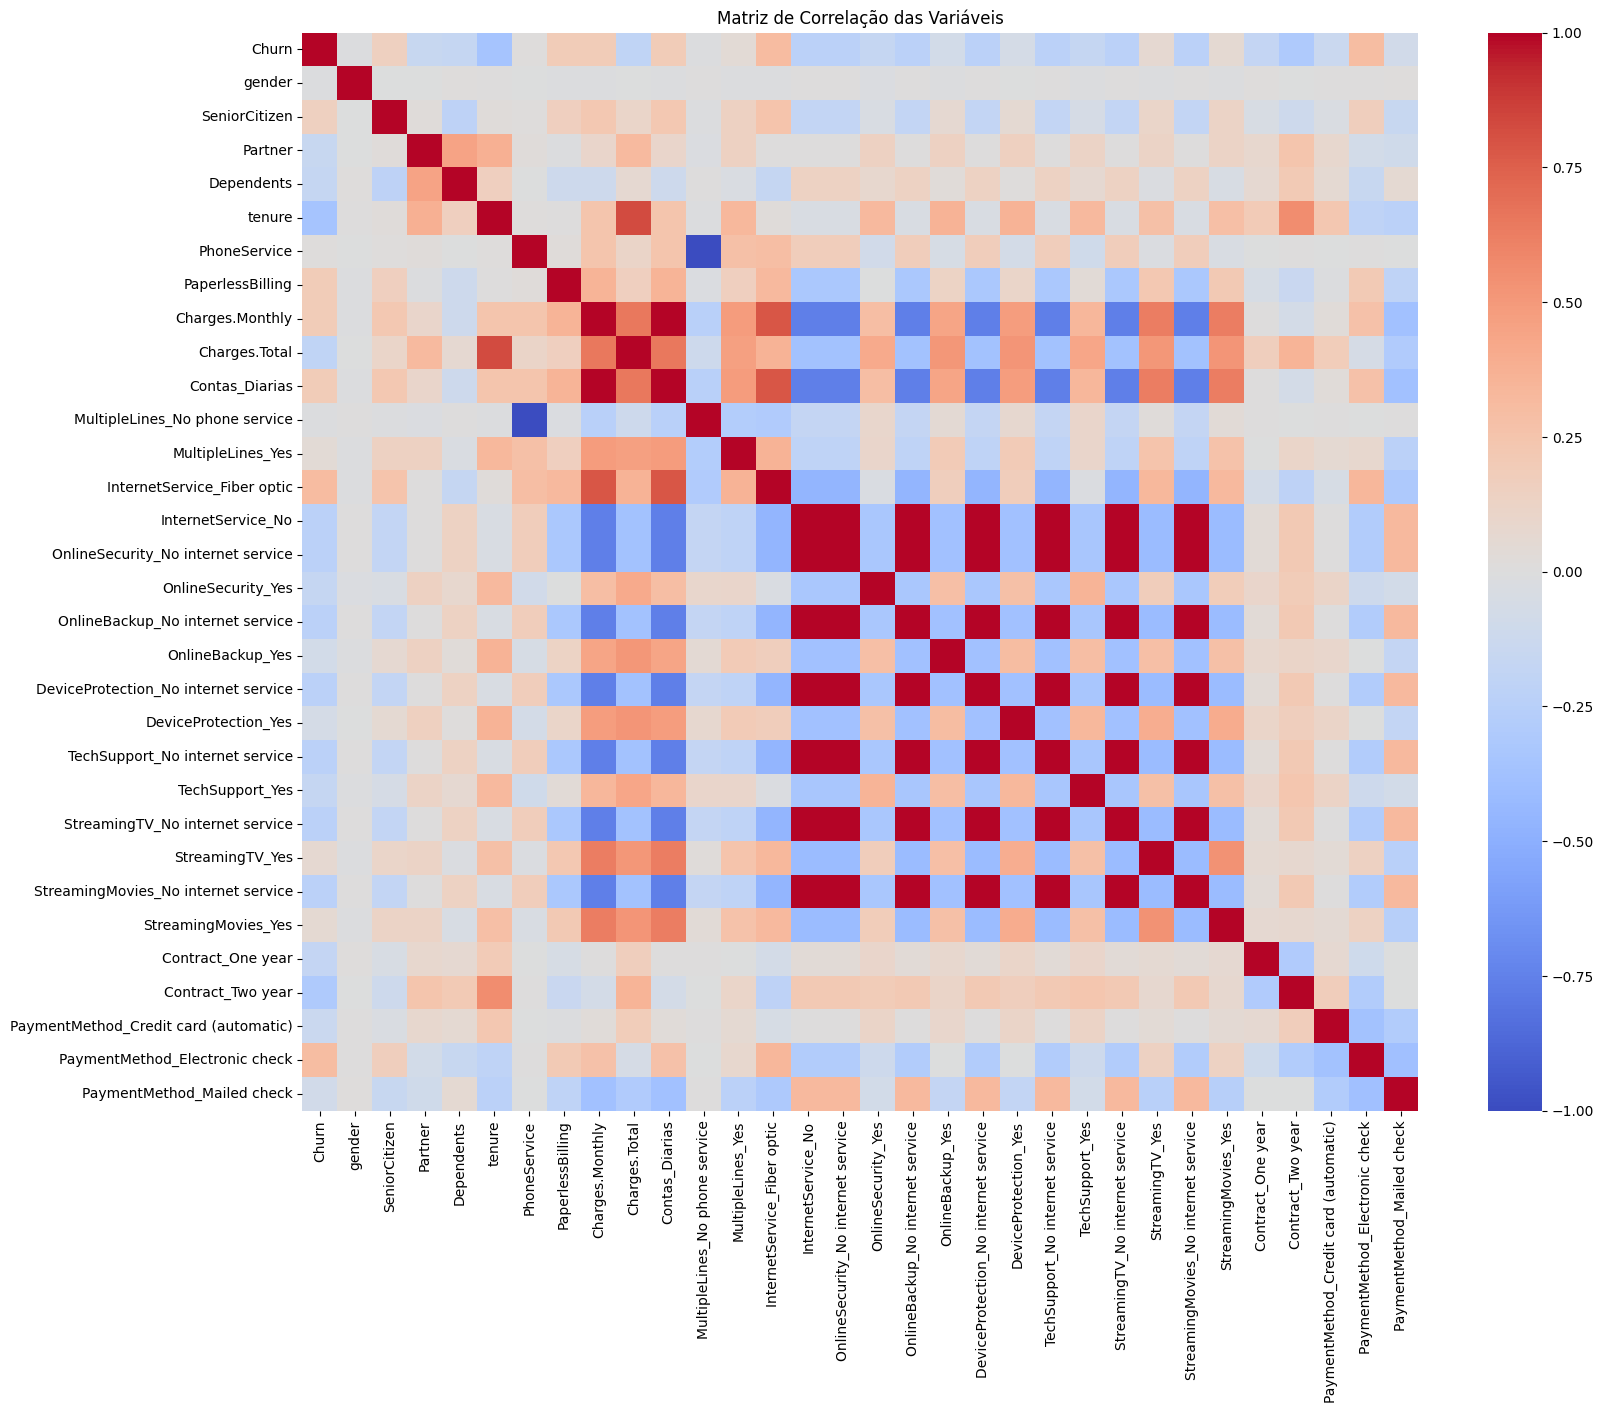


Correlação das variáveis com 'Churn':
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Charges.Monthly                          0.193356
Contas_Diarias                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a matriz de correlação do dataframe completo (incluindo 'Churn')
# Como as variáveis categóricas já foram codificadas para numérico/booleano, a correlação funcionará
correlation_matrix = df.corr()

# Exiba a matriz de correlação (opcional, pode ser grande)
# display(correlation_matrix)

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(18, 14)) # Ajuste o tamanho conforme necessário
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Exiba as correlações com a variável 'Churn'
print("\nCorrelação das variáveis com 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))

Análises Direcionadas

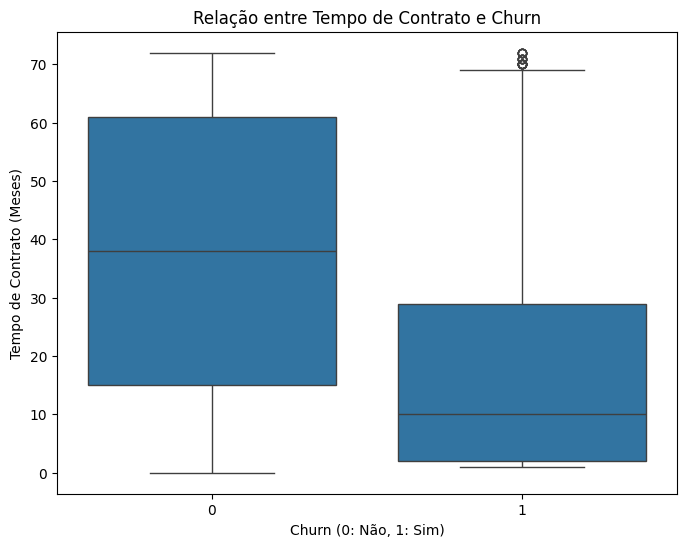

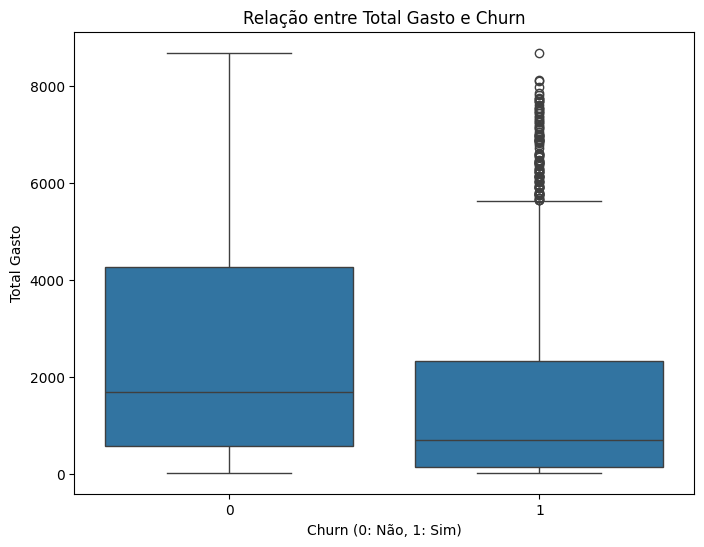

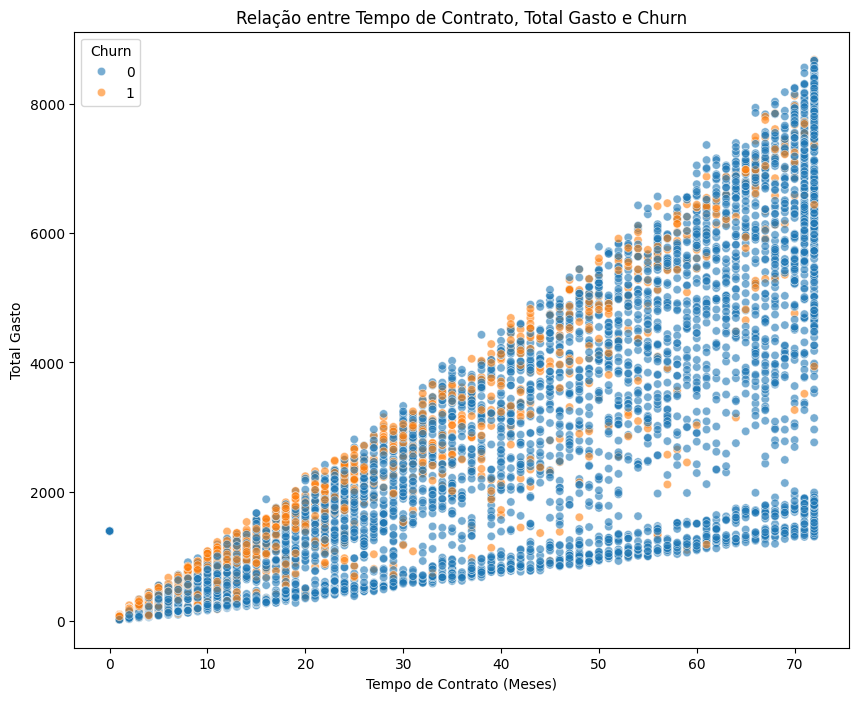

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise da relação entre Tempo de Contrato (tenure) e Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Relação entre Tempo de Contrato e Churn')
plt.xlabel('Churn (0: Não, 1: Sim)')
plt.ylabel('Tempo de Contrato (Meses)')
plt.show()

# Análise da relação entre Total Gasto (Charges.Total) e Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Relação entre Total Gasto e Churn')
plt.xlabel('Churn (0: Não, 1: Sim)')
plt.ylabel('Total Gasto')
plt.show()

# Análise da relação entre Total Gasto (Charges.Total) e Tempo de Contrato (tenure) com Churn como cor
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title('Relação entre Tempo de Contrato, Total Gasto e Churn')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Total Gasto')
plt.show()

🤖 Modelagem Preditiva

In [10]:
from sklearn.model_selection import train_test_split

# Dividir o dataset rebalanceado em treino e teste
# Usando uma proporção de 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape do conjunto de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)

# Verificar a proporção de classes nos conjuntos de treino e teste (deve ser similar devido ao stratify)
print("\nProporção de classes no conjunto de treino:\n", y_train.value_counts(normalize=True))
print("\nProporção de classes no conjunto de teste:\n", y_test.value_counts(normalize=True))

Shape do conjunto de treino (X_train, y_train): (8278, 31) (8278,)
Shape do conjunto de teste (X_test, y_test): (2070, 31) (2070,)

Proporção de classes no conjunto de treino:
 Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

Proporção de classes no conjunto de teste:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


Criação de Modelos

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Modelo de Regressão Logística (requer dados escalados)
# Justificativa: A Regressão Logística é um modelo linear que estima a probabilidade de uma instância pertencer a uma determinada classe.
# É sensível à escala das features, por isso utilizamos os dados escalados (X_train_scaled, X_test_scaled).
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste escalado
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Avaliar o modelo de Regressão Logística
print("Avaliação do Modelo de Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logistic))

print("-" * 30) # Separador

# 2. Modelo de Random Forest (não requer dados escalados)
# Justificativa: Random Forest é um modelo baseado em árvores de decisão.
# Modelos baseados em árvores não são sensíveis à escala dos dados, portanto,
# podemos usar os dados de treino e teste originais (não escalados).
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train) # Usando dados de treino NÃO escalados

# Fazer previsões no conjunto de teste NÃO escalado
y_pred_rf = random_forest_model.predict(X_test) # Usando dados de teste NÃO escalados

# Avaliar o modelo de Random Forest
print("Avaliação do Modelo de Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.7966183574879228
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1035
           1       0.79      0.81      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

------------------------------
Avaliação do Modelo de Random Forest:
Acurácia: 0.8342995169082126
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1035
           1       0.83      0.85      0.84      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



Avaliação dos Modelos

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.7966183574879228
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1035
           1       0.79      0.81      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070


Matriz de Confusão (Regressão Logística):
 [[813 222]
 [199 836]]


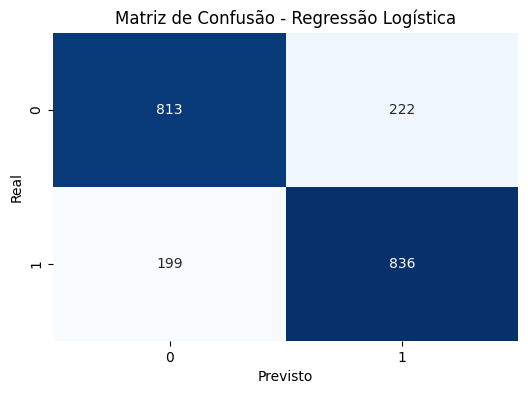

------------------------------
Avaliação do Modelo de Random Forest:
Acurácia: 0.8342995169082126
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1035
           1       0.83      0.85      0.84      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


Matriz de Confusão (Random Forest):
 [[851 184]
 [159 876]]


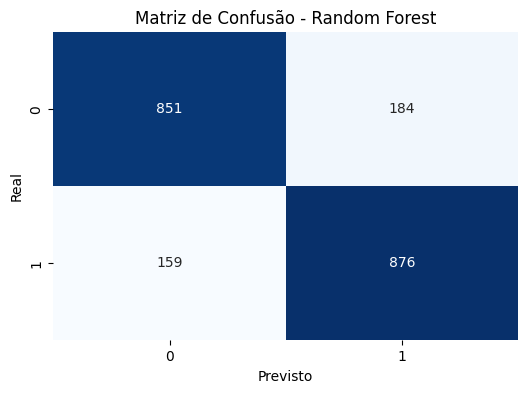

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Avaliação do Modelo de Regressão Logística
print("Avaliação do Modelo de Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logistic))

# Matriz de Confusão para Regressão Logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\nMatriz de Confusão (Regressão Logística):\n", cm_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


print("-" * 30) # Separador

# Avaliação do Modelo de Random Forest
print("Avaliação do Modelo de Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

# Matriz de Confusão para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusão (Random Forest):\n", cm_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

📋  Interpretação e Conclusões

In [13]:
import pandas as pd

# Análise de Importância das Variáveis

# 1. Regressão Logística: Análise dos Coeficientes
# Os coeficientes indicam a mudança na probabilidade logarítmica de churn para cada unidade de aumento na feature (mantendo outras features constantes).
# Coeficientes positivos indicam que a feature aumenta a probabilidade de churn.
# Coeficientes negativos indicam que a feature diminui a probabilidade de churn.
print("Importância das Variáveis (Coeficientes da Regressão Logística):")
# Como os dados de treino foram escalados, os coeficientes são comparáveis em magnitude
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': logistic_model.coef_[0]})
coefficients['abs_coefficient'] = abs(coefficients['coefficient'])
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=False)
display(coefficients)

print("-" * 30) # Separador

# 2. Random Forest: Análise da Importância das Features
# A importância das features é calculada com base na redução média da impureza (Gini impurity ou entropy) proporcionada por cada feature em todas as árvores.
# Valores mais altos indicam maior importância.
print("Importância das Variáveis (Feature Importance do Random Forest):")
feature_importances_rf = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='importance', ascending=False)
display(feature_importances_rf)

Importância das Variáveis (Coeficientes da Regressão Logística):


,feature,coefficient,abs_coefficient
12,InternetService_Fiber optic,2.719574,2.719574
9,Contas_Diarias,-2.557757,2.557757
7,Charges.Monthly,-2.557757,2.557757
4,tenure,-1.838191,1.838191
23,StreamingTV_Yes,0.997439,0.997439
8,Charges.Total,0.983037,0.983037
25,StreamingMovies_Yes,0.923353,0.923353
29,PaymentMethod_Electronic check,0.765490,0.765490
11,MultipleLines_Yes,0.725781,0.725781
19,DeviceProtection_Yes,0.477639,0.477639


------------------------------
Importância das Variáveis (Feature Importance do Random Forest):


,feature,importance
4,tenure,0.140315
8,Charges.Total,0.140137
7,Charges.Monthly,0.103217
9,Contas_Diarias,0.101384
29,PaymentMethod_Electronic check,0.095973
12,InternetService_Fiber optic,0.051957
27,Contract_Two year,0.043028
2,Partner,0.031558
3,Dependents,0.028208
11,MultipleLines_Yes,0.021895


Relatório Final

## 📋 Relatório Final: Análise de Evasão de Clientes e Estratégias de Retenção

Este relatório apresenta uma análise dos fatores que mais influenciam a evasão de clientes (`Churn`) com base nos dados fornecidos e nos modelos preditivos desenvolvidos (Regressão Logística e Random Forest).

### Principais Fatores que Influenciam a Evasão

Com base na análise de correlação e na importância das variáveis dos modelos, os fatores que demonstraram maior influência na evasão de clientes são:

1.  **Tempo de Contrato (`tenure`)**: Clientes com menor tempo de contrato apresentaram uma correlação negativa significativa com o churn e foi uma das variáveis mais importantes para ambos os modelos. Isso sugere que clientes novos ou com poucos meses de serviço são mais propensos a evadir.
2.  **Total Gasto (`Charges.Total`) e Gasto Mensal (`Charges.Monthly`/`Contas_Diarias`)**: Essas variáveis estão positivamente correlacionadas com o churn (para `Charges.Monthly`/`Contas_Diarias`) e negativamente correlacionadas (para `Charges.Total`), e foram importantes nos modelos. Clientes com gastos mensais mais altos, mas com menor total gasto acumulado (o que pode indicar que são clientes mais recentes com planos caros), tendem a evadir mais. A correlação negativa com `Charges.Total` para clientes que evadem (comparado aos que ficam) sugere que clientes que permanecem acumulam um total gasto maior ao longo do tempo.
3.  **Tipo de Serviço de Internet (`InternetService_Fiber optic`)**: Clientes com serviço de fibra óptica (`InternetService_Fiber optic` com alta correlação positiva) apresentaram maior probabilidade de churn na Regressão Logística. Isso pode indicar problemas com a qualidade do serviço de fibra ou custos associados.
4.  **Método de Pagamento (`PaymentMethod_Electronic check`)**: O pagamento por cheque eletrônico (`PaymentMethod_Electronic check` com alta correlação positiva) também se mostrou um fator relevante para a evasão, especialmente no modelo Random Forest. Pode haver insatisfação associada a este método de pagamento ou a perfil de cliente que o utiliza.
5.  **Tipo de Contrato (`Contract_Two year` e `Contract_One year`)**: Contratos de longo prazo (dois anos) têm uma forte correlação negativa com o churn e alta importância nos modelos, indicando que clientes com contratos mais longos são muito menos propensos a evadir. Contratos de um ano também têm correlação negativa, mas menor do que os de dois anos.

Outras variáveis como **SeniorCitizen**, **PaperlessBilling**, **StreamingTV_Yes**, **StreamingMovies_Yes**, **MultipleLines_Yes** também apresentaram alguma influência, mas com menor destaque que as mencionadas acima. Serviços adicionais como **OnlineSecurity_Yes**, **TechSupport_Yes**, **OnlineBackup_Yes** e **DeviceProtection_Yes** mostraram correlação negativa e importância nos modelos, sugerindo que clientes que utilizam esses serviços tendem a evadir menos.

### Desempenho dos Modelos

Foram avaliados dois modelos preditivos: Regressão Logística e Random Forest.

*   O modelo **Random Forest** demonstrou um desempenho superior no conjunto de teste rebalanceado, apresentando maior acurácia, precisão, recall e F1-score para ambas as classes em comparação com a Regressão Logística. Ele cometeu menos erros de classificação (Falsos Positivos e Falsos Negativos).
*   O modelo de **Regressão Logística** também teve um desempenho razoável, mas inferior ao Random Forest.

Com base nesta análise, o modelo Random Forest é o mais indicado para a tarefa de prever a evasão de clientes neste cenário.

### Estratégias de Retenção Propostas

Com base nos fatores identificados que mais influenciam a evasão, as seguintes estratégias de retenção podem ser consideradas:

1.  **Foco em Clientes Novos:** Implementar programas de onboarding aprimorados e acompanhamento especial para clientes nos primeiros meses de contrato. Ofertas exclusivas ou benefícios para contratos de longo prazo podem ser atrativos.
2.  **Análise e Melhoria do Serviço de Fibra Óptica:** Investigar as causas da alta taxa de evasão entre clientes de fibra óptica. Pode envolver a melhoria da qualidade da conexão, suporte técnico dedicado, ou comunicação mais clara sobre os custos e benefícios.
3.  **Avaliação e Otimização do Método de Pagamento por Cheque Eletrônico:** Investigar se há problemas ou insatisfação associada ao método de pagamento por cheque eletrônico. Oferecer alternativas de pagamento mais convenientes ou incentivos para mudar de método podem ser eficazes.
4.  **Promoção de Contratos de Longo Prazo:** Incentivar os clientes a aderir a contratos de um ou dois anos, destacando os benefícios e a economia a longo prazo.
5.  **Incentivo à Adesão a Serviços Adicionais:** Promover serviços como segurança online, suporte técnico, backup e proteção de dispositivos, destacando como eles aumentam a satisfação e reduzem a probabilidade de churn.
6.  **Monitoramento de Clientes de Alto Gasto Mensal e Baixo Tempo de Contrato:** Identificar esses clientes e oferecer suporte proativo ou ofertas personalizadas para aumentar sua satisfação e retenção.

Este relatório fornece uma base para entender os principais impulsionadores da evasão de clientes e sugere ações estratégicas para melhorar a retenção. Análises mais aprofundadas e a implementação de testes A/B podem ajudar a validar a eficácia dessas estratégias.